# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls  --- Look at the file on GitLab for example!
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# # # Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [14]:
# set up lists to hold reponse info
lat = []
lon = []
max_temp = []
hum = []
cloud = []
wspeed = []
country = []
date = []


#counter
counter = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    # Create search query, make request and store in json
    query = query_url + city
    response = requests.get(query)
    response_json = response.json()   
    
    try:
        lat.append(response_json['coord']['lat'])
        lon.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        hum.append(response_json['main']['humidity'])
        cloud.append(response_json['clouds']['all'])
        wspeed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        counter = counter + 1
        print(f" Processing Record {counter} | {city}")
        
    except:
        # Append null values
        print("City not found. Skipping.")
        pass

 Processing Record 1 | rikitea
 Processing Record 2 | saint-philippe
City not found. Skipping.
 Processing Record 3 | yellowknife
 Processing Record 4 | poopo
 Processing Record 5 | mar del plata
 Processing Record 6 | avarua
 Processing Record 7 | yulara
 Processing Record 8 | puerto ayora
 Processing Record 9 | ushuaia
 Processing Record 10 | vaini
 Processing Record 11 | bredasdorp
 Processing Record 12 | esperance
 Processing Record 13 | wanning
 Processing Record 14 | homestead
 Processing Record 15 | marathon
 Processing Record 16 | tiksi
 Processing Record 17 | cape town
 Processing Record 18 | albany
 Processing Record 19 | ixtapa
 Processing Record 20 | jamestown
 Processing Record 21 | necochea
 Processing Record 22 | bud
 Processing Record 23 | victoria
City not found. Skipping.
 Processing Record 24 | clyde river
 Processing Record 25 | tuatapere
 Processing Record 26 | georgetown
City not found. Skipping.
 Processing Record 27 | severo-kurilsk
 Processing Record 28 | busse

 Processing Record 224 | sitka
 Processing Record 225 | sulangan
 Processing Record 226 | broome
 Processing Record 227 | carnarvon
City not found. Skipping.
 Processing Record 228 | tilichiki
 Processing Record 229 | yataity
 Processing Record 230 | nabire
City not found. Skipping.
 Processing Record 231 | kampot
City not found. Skipping.
 Processing Record 232 | taga
 Processing Record 233 | yelizovo
 Processing Record 234 | hohhot
 Processing Record 235 | yelovo
 Processing Record 236 | castelfidardo
 Processing Record 237 | narsaq
 Processing Record 238 | port augusta
 Processing Record 239 | hasaki
 Processing Record 240 | lengshuitan
 Processing Record 241 | povenets
 Processing Record 242 | faanui
 Processing Record 243 | fort nelson
 Processing Record 244 | mount gambier
 Processing Record 245 | spitsevka
 Processing Record 246 | yerbogachen
 Processing Record 247 | silvania
 Processing Record 248 | udala
 Processing Record 249 | san ramon
 Processing Record 250 | aklavik
 Proc

 Processing Record 447 | kisangani
 Processing Record 448 | zhangye
 Processing Record 449 | kajaani
City not found. Skipping.
 Processing Record 450 | santa teresa
 Processing Record 451 | krasnogorskoye
 Processing Record 452 | christchurch
 Processing Record 453 | ambagarh chauki
 Processing Record 454 | mariental
 Processing Record 455 | aksu
 Processing Record 456 | kangaatsiaq
 Processing Record 457 | talnakh
 Processing Record 458 | at-bashi
 Processing Record 459 | poros
 Processing Record 460 | tura
 Processing Record 461 | mettingen
 Processing Record 462 | talara
 Processing Record 463 | khani
City not found. Skipping.
 Processing Record 464 | zabid
 Processing Record 465 | mersing
 Processing Record 466 | kilembe
 Processing Record 467 | general roca
 Processing Record 468 | carnduff
 Processing Record 469 | lalupon
 Processing Record 470 | warri
 Processing Record 471 | uribia
 Processing Record 472 | regina
 Processing Record 473 | trelew
 Processing Record 474 | kahului


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Create DF
# ValueError: arrays must all be same length

weather_df = pd.DataFrame.from_dict({
    "City": cities,
    "Lat": lat,
    "Lng": lon,
    "Max_Temp": max_temp,
    "Humidity": hum,
    "Cloudiness": cloud,
    "Wind_speed": wspeed,
    "Country": country,
    "Date": date
}, orient='index')

#weather_df.transpose()
transposed_df = weather_df.transpose()
# solution found here: https://stackoverflow.com/questions/40442014/python-pandas-valueerror-arrays-must-be-all-same-length

In [16]:
# count data
transposed_df.count()

City          616
Lat           561
Lng           561
Max_Temp      561
Humidity      561
Cloudiness    561
Wind_speed    561
Country       561
Date          561
dtype: int64

In [17]:
# get rid of 'none' values - city outnumbers rest of data
cleaned_weather_df = transposed_df.dropna()
# check in count
cleaned_weather_df.count()

City          561
Lat           561
Lng           561
Max_Temp      561
Humidity      561
Cloudiness    561
Wind_speed    561
Country       561
Date          561
dtype: int64

In [18]:
cleaned_weather_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_speed,Country,Date
0,rikitea,-23.12,-134.97,72.9,90,96,12.01,PF,1596609330
1,saint-philippe,-21.36,55.77,72,64,47,13.87,RE,1596609330
2,taolanaro,62.46,-114.35,59,100,75,9.17,CA,1596609092
3,yellowknife,-18.37,-66.97,36.52,77,0,2.82,BO,1596609331
4,poopo,-38,-57.56,60.01,100,100,3.36,AR,1596609032


In [19]:
# export csv
cleaned_weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
# locate humidity outliers
humid_outliers = cleaned_weather_df.loc[cleaned_weather_df['Humidity'] > 100]

In [ ]:
# no outliers 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

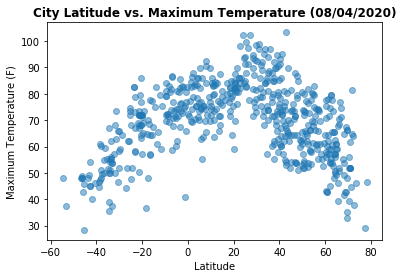

<Figure size 864x432 with 0 Axes>

In [27]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(cleaned_weather_df["Lat"], cleaned_weather_df["Max_Temp"], color = "tab:blue", alpha=0.5)

# Titles
plt.title("City Latitude vs. Maximum Temperature (08/04/2020)", fontweight = "black")
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")

# formatting
plt.figure(figsize=(12,6))

# save figure
plt.savefig('../output_data/CityLatVsMaxTemp.png')
plt.show()

## Latitude vs. Humidity Plot

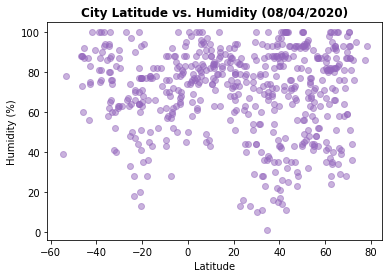

<Figure size 864x432 with 0 Axes>

In [29]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(cleaned_weather_df["Lat"], cleaned_weather_df["Humidity"], color = "tab:purple", alpha=0.5)

# Titles
plt.title("City Latitude vs. Humidity (08/04/2020)", fontweight = "black")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# formatting
plt.figure(figsize=(12,6))

# save figure
plt.savefig('../output_data/CityLatVsHumidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

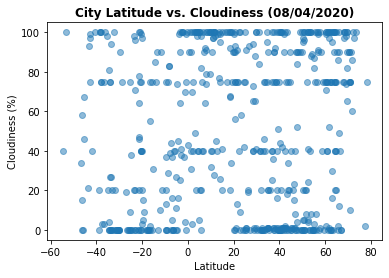

<Figure size 864x432 with 0 Axes>

In [31]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(cleaned_weather_df["Lat"], cleaned_weather_df["Cloudiness"], color = "tab:blue", alpha=0.5)

# Titles
plt.title("City Latitude vs. Cloudiness (08/04/2020)", fontweight = "black")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# formatting
plt.figure(figsize=(12,6))

# save figure
plt.savefig('../output_data/CityLatVsCloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

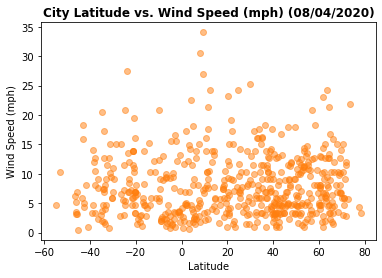

<Figure size 864x432 with 0 Axes>

In [34]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(cleaned_weather_df["Lat"], cleaned_weather_df["Wind_speed"], color = "tab:orange", alpha=0.5)

# Titles
plt.title("City Latitude vs. Wind Speed (mph) (08/04/2020)", fontweight = "black")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# formatting
plt.figure(figsize=(12,6))

# save figure
plt.savefig('../output_data/CityLatVsWindSpeed.png')
plt.show()

## Linear Regression

In [61]:
# OPTIONAL: Create a function to create Linear Regression plots


In [58]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = cleaned_weather_df.loc[(cleaned_weather_df["Lat"] >= 0) & (cleaned_weather_df["Lat"] <= 90)]

south_hem = cleaned_weather_df.loc[(cleaned_weather_df["Lat"] >= -90) & (cleaned_weather_df["Lat"] <= 0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [1]:
#AttributeError: 'float' object has no attribute 'shape'
# x_values = north_hem["Lat"]
# y_values = north_hem["Max_Temp"]
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,45),fontsize=15,color="red")
# plt.title("Max Temp Relative to Latitude in Northern Hemisphere Cities (8/03/2020)")
# plt.xlabel("Latitude")
# plt.ylabel("Max Temperature (F)")
# plt.grid(True)
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression